In [1]:
print('starting')
import os
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
print('importing ancova')
from pingouin import ancova
print('done')

starting
importing ancova
done


In [2]:
feature_type = '5e-4_qval'
status_col = 'revisions_ER_status_binary'
data = pd.read_csv('../../MBC/ATAC_nucleosome_profiling/analysis/merged_data/'+feature_type+'_data_with_features.txt',sep='\t')
data = data[((data['tumor_fraction']>=0.1) & (data['ulp_wgs_coverage']>=0.1))]
data = data[~(data[status_col]=='none')]


In [3]:
color_dict = {'+':'tab:blue', '-':'tab:orange','pos_deep':'tab:green','neg_deep':'tab:red','HD_deep':'black'}

In [4]:
print(len(data['sample'].unique())) #191 ULP 
data[['sample',status_col]].drop_duplicates()[status_col].value_counts()

191


+    100
-     91
Name: revisions_ER_status_binary, dtype: int64

In [5]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [6]:
data.head()

,sample,patient_id,revisions_ER_status_binary,ulp_wgs_coverage,tumor_fraction,first_passing_sample,site_name,correction,number_of_sites,central_coverage,...,855,870,885,900,915,930,945,960,975,site_group
8,MBC_291.ctDNA_ULP,MBC_291,+,0.215313,0.3617,NaN,ER_neg_heme.5e-4_qval,GC_corrected,22365,0.87066,...,0.96776,0.96953,0.97107,0.95565,0.96934,0.96650,0.95394,0.97018,0.98377,5e-4_qval
9,MBC_291.ctDNA_ULP,MBC_291,+,0.215313,0.3617,NaN,ER_pos_heme.5e-4_qval,GC_corrected,9930,0.89180,...,0.93379,0.95558,0.99834,1.02726,1.04245,1.02403,1.00063,1.00844,0.99320,5e-4_qval
10,MBC_291.ctDNA_ULP,MBC_291,+,0.215313,0.3617,NaN,ER_pos_specific.5e-4_qval,GC_corrected,18240,0.92458,...,1.00664,1.00712,0.97272,0.98308,0.96943,0.96235,0.94166,0.95507,0.97920,5e-4_qval
11,MBC_291.ctDNA_ULP,MBC_291,+,0.215313,0.3617,NaN,ER_neg_specific.5e-4_qval,GC_corrected,19347,0.98605,...,0.97961,0.97408,0.98572,0.97791,0.99091,0.97680,0.98403,0.99453,0.98696,5e-4_qval
20,MBC_1368_3_ULP,MBC_1368,+,0.138754,0.1829,1.0,ER_neg_heme.5e-4_qval,GC_corrected,22365,0.88269,...,1.04322,1.03098,1.03884,1.02733,1.00727,0.98945,0.96477,0.91726,0.93476,5e-4_qval


In [7]:
def fill_plot(ax,feature): 
    #perform ancova on the current feature
    current = data[(data['site_name']==site_name)]
    print('ancova',len(current))
    ancova_results = ancova(data=current, dv=feature, covar='tumor_fraction', between=status_col)
    del(current)
    ancova_pval = ancova_results.set_index('Source')['p-unc'][status_col]
    
    text_dict = {}
    for subtype in ['+','-']:
        #scatter plot the data
        current = data[(data[status_col]==subtype) & (data['site_name']==site_name)]
        x = current['tumor_fraction']
        y = current[feature]
        ax.scatter(x,y,  alpha = 0.3, color = color_dict[subtype])
        print(subtype,len(current))
        
        #add correlation line
        lin_reg_slope, lin_reg_intercept, pearson_r, pearson_p, lin_reg_std_err = linregress(x,y)
        fit_line = lin_reg_slope*x+lin_reg_intercept
        formatted_p = '{:0.2e}'.format(pearson_p)
        formatted_rho = str(np.round(pearson_r,2))
        ax.plot(x,fit_line,color=color_dict[subtype])
        current_text = 'ER'+subtype+' r='+formatted_rho+' p='+formatted_p
        text_dict[subtype] = current_text
        del(current,subtype)
        
    ax.text(0.1,0.9,'ANCOVA ER p={:0.2e}'.format(ancova_pval), transform=ax.transAxes)
    ax.text(0.1,0.83, text_dict['+'], transform=ax.transAxes)
    ax.text(0.1,0.76, text_dict['-'], transform=ax.transAxes)
        

    ######################

ER_pos_specific.5e-4_qval 0.2389969825744629
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ER_pos_heme.5e-4_qval 0.9471182823181152
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ER_neg_specific.5e-4_qval 1.0324163436889648
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ER_neg_heme.5e-4_qval 1.1207728385925293
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
ancova 191
+ 100
- 91
done


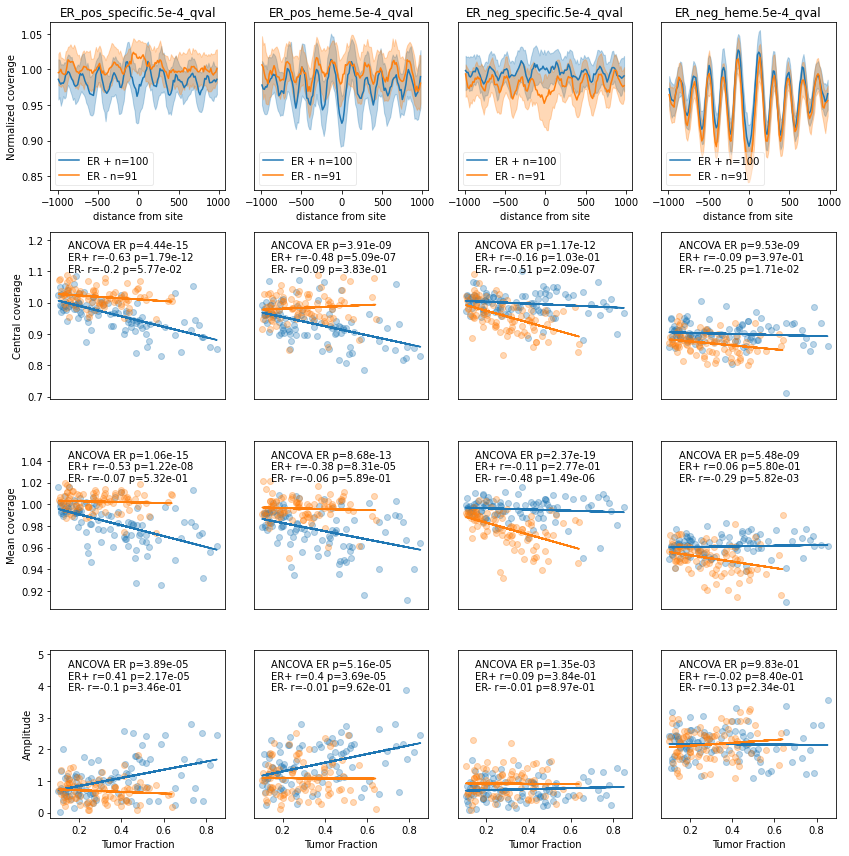

In [8]:
start_time = time.time()

fig,axes = plt.subplots(4,4,figsize=(12,12), sharey = 'row')

for i,site_name in enumerate(['ER_pos_specific.5e-4_qval','ER_pos_heme.5e-4_qval','ER_neg_specific.5e-4_qval','ER_neg_heme.5e-4_qval']):
    print(site_name, time.time()-start_time)
    
    ######################
    #plot the tumor fraction correlation 
    fill_plot(axes[1,i],'central_coverage')
    axes[1,0].set_ylabel('Central coverage')
    
    fill_plot(axes[2,i],'mean_coverage')
    axes[2,0].set_ylabel('Mean coverage')

    fill_plot(axes[3,i],'amplitude')
    axes[3,0].set_ylabel('Amplitude')
    
    ######################
    #plot coverage in top row
    ax = axes[0,i]
    for subtype in ['+','-']:
        current = data[(data[status_col]==subtype) & (data['site_name']==site_name)]
        ax.plot(plot_columns, current[str_plot_columns].median(), color = color_dict[subtype], label = 'ER '+subtype+' n='+str(len(current)))
        ax.fill_between(plot_columns, np.percentile(current[str_plot_columns],25, axis = 0), np.percentile(current[str_plot_columns],75, axis = 0), color = color_dict[subtype], alpha=0.3)
    ax.set_title(site_name)
    #remove ticks on the left
    ax.tick_params(left = False)
    ax.set_xlabel('distance from site')
    ax.legend(loc='lower left', framealpha = 0.4)
    ######################

    #remove tick labels on the left of every box and the bottom of every box
    axes[1,i].tick_params(bottom = False, labelbottom = False, left = False, labelleft=False)
    axes[2,i].tick_params(bottom = False, labelbottom = False, left = False, labelleft=False)
    
    #for the last row only remove the left and add the tumor fraction label
    axes[3,i].tick_params(left = False, labelleft=False)
    axes[3,i].set_xlabel('Tumor Fraction')
    
#label the y axis in the first column
axes[0,0].tick_params(left = True, labelleft=True)
axes[1,0].tick_params(left = True, labelleft=True)
axes[2,0].tick_params(left = True, labelleft=True)
axes[3,0].tick_params(left = True, labelleft=True)

axes[0,0].set_ylabel('Normalized coverage')

#add enough space for the legends
for i in [1,2,3]:
    a,b = axes[i,0].get_ylim()
    axes[i,0].set_ylim(a,b+(b-a)*.25)


fig.tight_layout()
fig.savefig('plots/ATAC_features_vs_tfx.pdf')
print('done')